# PreCog Classification Task

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv('./All_States_GE_CSV.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28304\3043495992.py:10: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./All_States_GE_CSV.csv')


In [21]:
def winner_by_state_and_const(row):
    state = row['State_Name']
    constituency = row['Constituency_No']
    vote_share = row['Vote_Share_Percentage']
    year = row['Year']
    df[(df['State_Name'] == state) & (df['Constituency_No'] == constituency)]
    # display(df[(df['State_Name'] == state) & (df['Constituency_No'] == constituency)])
    max_vote_share = df[(df['State_Name'] == state) & (df['Constituency_No'] == constituency) & (df['Year'] == year)]['Vote_Share_Percentage'].max()
    # print(vote_share, max_vote_share)
    return bool(vote_share == max_vote_share)

In [22]:
cand_df = df[df['Year'] == 2014].copy()
display(cand_df['Year'].tail())
cand_df['Won'] = cand_df.apply(winner_by_state_and_const, axis=1)
cand_df = cand_df[['State_Name', 'Sex', 'Party', 'Constituency_Type', 'Party_Type_TCPD', 'Turncoat', 'Incumbent', 'Recontest', 'MyNeta_education', 'Won']]
cand_df.dropna(inplace=True)

17548    2014
17549    2014
17550    2014
17551    2014
17552    2014
Name: Year, dtype: int64

In [23]:
cand_df['Won'] = cand_df['Won'].astype(int)
display(cand_df.head())

,State_Name,Sex,Party,Constituency_Type,Party_Type_TCPD,Turncoat,Incumbent,Recontest,MyNeta_education,Won
8710,Andaman_&_Nicobar_Islands,M,BJP,GEN,National Party,False,True,True,Graduate,1
8711,Andaman_&_Nicobar_Islands,M,INC,GEN,National Party,False,False,True,Graduate Professional,0
8712,Andaman_&_Nicobar_Islands,M,AAAP,GEN,State-based Party (Other State),False,False,False,10th Pass,0
8713,Andaman_&_Nicobar_Islands,F,AITC,GEN,State-based Party,False,False,False,Graduate,0
8714,Andaman_&_Nicobar_Islands,M,CPM,GEN,National Party,False,False,False,12th Pass,0


In [24]:
le = LabelEncoder()
cand_df['State_Name'] = le.fit_transform(cand_df['State_Name'])
cand_df['Sex'] = le.fit_transform(cand_df['Sex'])
cand_df['Party'] = le.fit_transform(cand_df['Party'])
cand_df['Constituency_Type'] = le.fit_transform(cand_df['Constituency_Type'])
cand_df['Party_Type_TCPD'] = le.fit_transform(cand_df['Party_Type_TCPD'])
cand_df['Turncoat'] = le.fit_transform(cand_df['Turncoat'])
cand_df['Incumbent'] = le.fit_transform(cand_df['Incumbent'])
cand_df['Recontest'] = le.fit_transform(cand_df['Recontest'])
cand_df['MyNeta_education'] = le.fit_transform(cand_df['MyNeta_education'])

In [25]:
display(cand_df.head())

,State_Name,Sex,Party,Constituency_Type,Party_Type_TCPD,Turncoat,Incumbent,Recontest,MyNeta_education,Won
8710,0,1,82,0,2,0,1,1,5,1
8711,0,1,163,0,2,0,0,1,6,0
8712,0,1,1,0,4,0,0,0,0,0
8713,0,0,30,0,3,0,0,0,5,0
8714,0,1,128,0,2,0,0,0,1,0


In [26]:
X = cand_df.drop(['Won', 'State_Name'], axis=1)
y = cand_df['Won']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


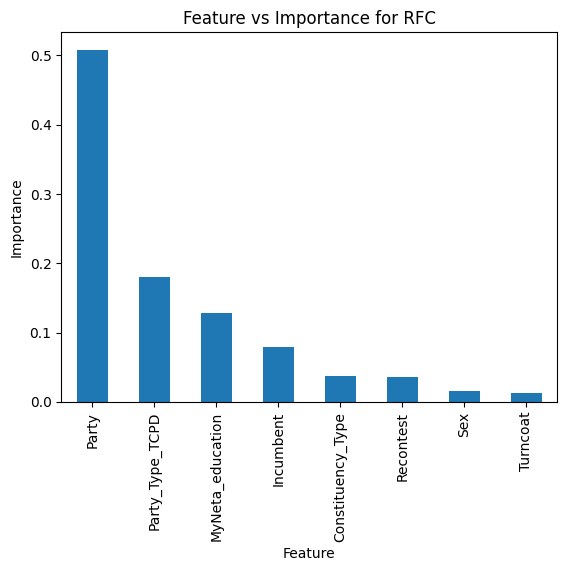

In [29]:
import matplotlib.pyplot as plt

importances = model.feature_importances_

importance_df = pd.Series(importances, index=X.columns)
importance_df = importance_df.sort_values(ascending=False)

importance_df.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature vs Importance for RFC')
plt.xticks(rotation=90)
plt.show()

Accuracy: 0.96


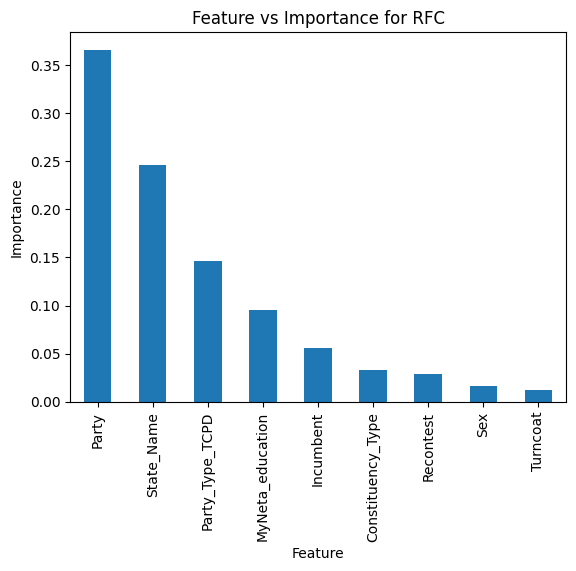

In [30]:
X = cand_df.drop(['Won'], axis=1)
y = cand_df['Won']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

importances = model.feature_importances_

importance_df = pd.Series(importances, index=X.columns)
importance_df = importance_df.sort_values(ascending=False)

importance_df.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature vs Importance for RFC')
plt.xticks(rotation=90)
plt.show()

In [31]:
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [32]:
model = SVC(gamma=2, C=1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [33]:
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


In [34]:
model = MLPClassifier(alpha=1, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [35]:
cand_df.head(2)

,State_Name,Sex,Party,Constituency_Type,Party_Type_TCPD,Turncoat,Incumbent,Recontest,MyNeta_education,Won
8710,0,1,82,0,2,0,1,1,5,1
8711,0,1,163,0,2,0,0,1,6,0


Predicted Column: State_Name
Accuracy: 0.25


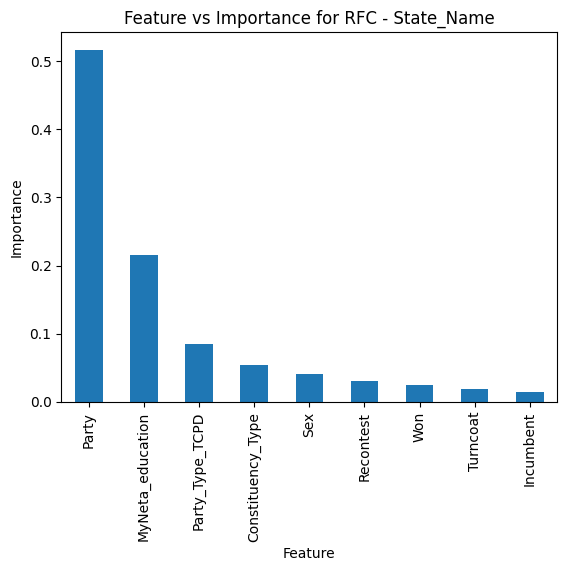

Predicted Column: Sex
Accuracy: 0.91


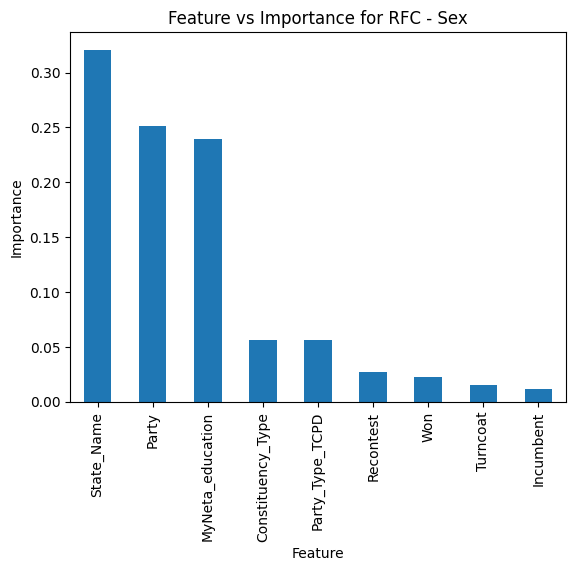

Predicted Column: Party
Accuracy: 0.61


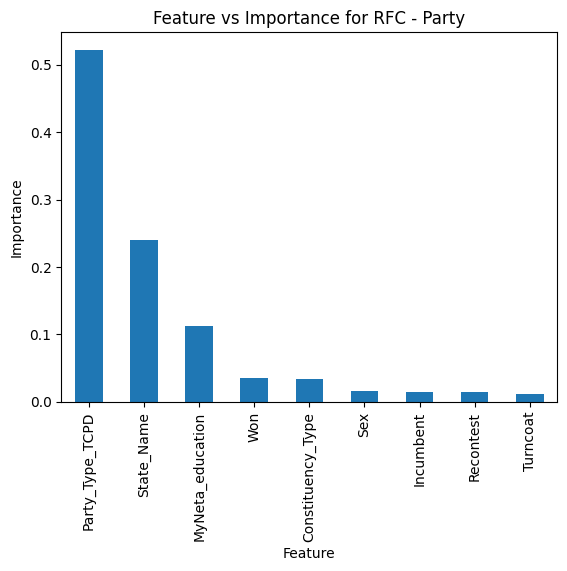

Predicted Column: Constituency_Type
Accuracy: 0.79


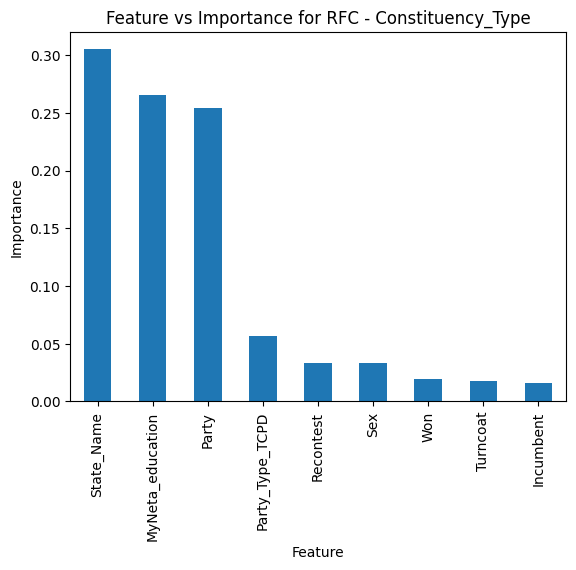

Predicted Column: Party_Type_TCPD
Accuracy: 0.93


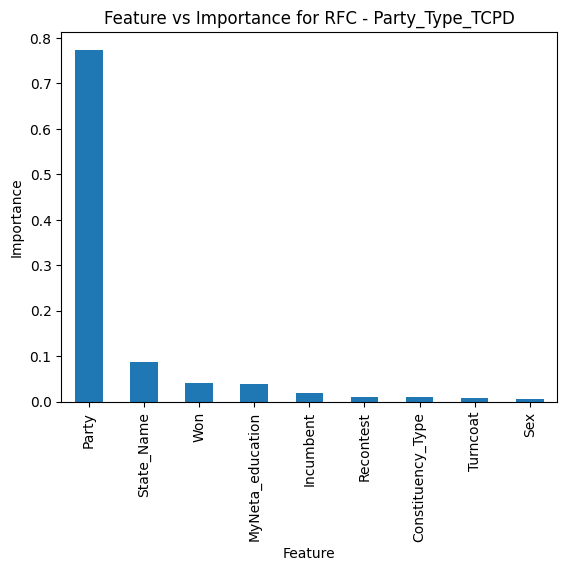

Predicted Column: Turncoat
Accuracy: 0.97


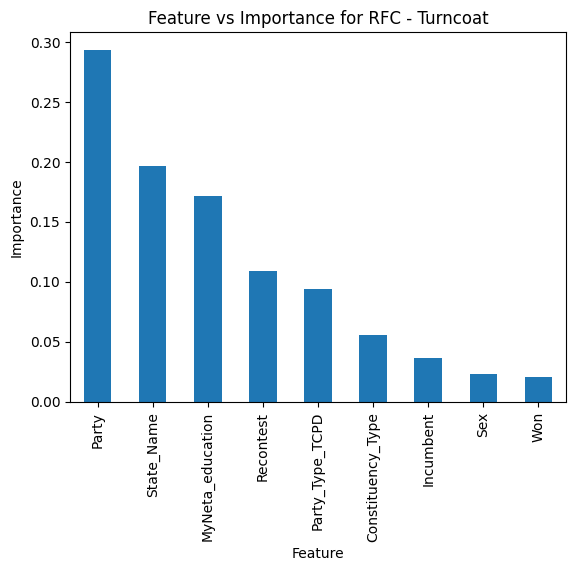

Predicted Column: Incumbent
Accuracy: 0.97


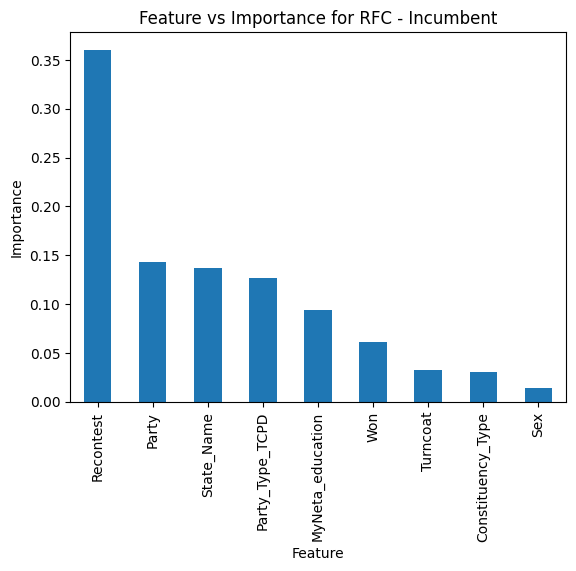

Predicted Column: Recontest
Accuracy: 0.90


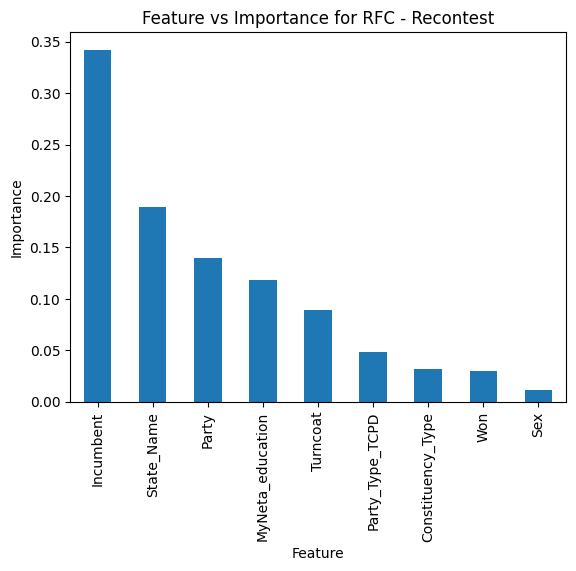

Predicted Column: MyNeta_education
Accuracy: 0.20


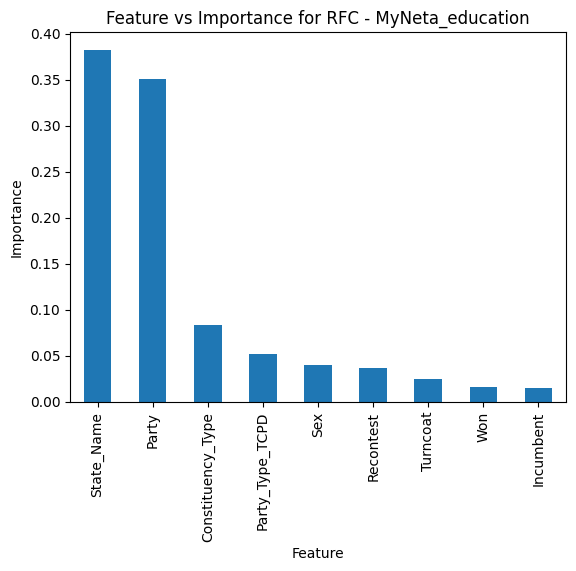

In [36]:
for target_column in X.columns:
    print('Predicted Column:', target_column)

    X = cand_df.copy()
    X = X.drop(target_column, axis=1)
    y = cand_df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    importances = model.feature_importances_

    importance_df = pd.Series(importances, index=X.columns)
    importance_df = importance_df.sort_values(ascending=False)
    
    importance_df.plot(kind='bar')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f'Feature vs Importance for RFC - {target_column}')
    plt.xticks(rotation=90)
    plt.show()

## Insights

* The party of a candidate, their state and whether they were incumbent play a big role in the candidate winning the election.
* On the other hand, their education, sex and constituency type do not play as much of a role as the above factors. This suggests that the party is often the biggest factor in whether the candidate wins or not. 
* May not be the same factor across years 